In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Here we consider the fractional riccati equation with fractional derivative, but here intended as conformable

# We use 3 layers with one hidden node

Moreover, we define the solution to the Riccati $$y_N := xN$$, where $N$ is the neural network,. Note that in such a way, the initial condition of the Riccati is automatically satisfied (see below). Moreover, in the main paper we found $a_0=0$ in the series expansion, and this automatically satisfies it.

$$D^\alpha y_N = \lambda y_N^2 + \mu y_N + \nu $$

with initial condition

$$I_{1-\alpha} y_N(0) = 0 $$

Where $I_\alpha$ defined as in the main paper (riemannliouv)

We consider interval $(0,1/252)$, with $T=\frac{1}{252}$.

We try to replicate the example in the paper, with 
$$\alpha = 0.64, \lambda = 0.045, \mu = -64.938, \nu = 44850 $$

We have $$f(x,y_N(x,\Omega)) = \lambda y_N^2 + \mu y_N + \nu $$

And The loss

$$ E[\Omega] = \sum_{i=1}^n [D^\alpha y_N(x_i,\Omega) - f]^2 $$

$$N(x,\Omega) = \sum_{j=1}^5 v_j\phi(w_jx+u_j) $$

$$ D_x^\alpha (N) := D_x^\alpha N(x,\Omega) = \sum_{j=1}^5 v_j \phi'(w_jx+u_j)w_jx^{1-\alpha} $$

$$D_x^\alpha y_N(x,\Omega) = D_x^\alpha (xN) = x^{1-\alpha}N + xD_x^\alpha (N) $$

In [2]:
T = 1/252
alp = 0.64
lamb = 0.2
mu = -44
nu = 230

In [3]:
def sigm_fun(x):
    return 1/(1+np.exp(-x))

def phi_prime(z): #1st derivative
    result = np.exp(-z)/((1+np.exp(-z))**2)
    return result

def phi_second(z): #2nd derivative
    first_addend = -np.exp(-z)/((1+np.exp(-z))**2)
    second_addend = 2*np.exp(-2*z)/((1+np.exp(-z))**3)
    return first_addend + second_addend

# Usa *args, come input e spacchetta

def compute_neural_network(x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    ''' NN '''
    result = v0*sigm_fun(w0*x+u0)
    result += v1*sigm_fun(w1*x+u1)
    result += v2*sigm_fun(w2*x+u2)
    result += v3*sigm_fun(w3*x+u3)
    result += v4*sigm_fun(w4*x+u4)
    return result


np.random.seed(10)
weights = np.random.uniform(low=-10, high=10, size=(15,))
v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4 = weights
print(weights)

[ 5.42641287 -9.58496101  2.6729647   4.97607765 -0.02985975 -5.50406709
 -6.0387427   5.21061424 -6.61778327 -8.23320372  3.70719637  9.06786692
 -9.92103467  0.24384527  6.25241923]


In [4]:
def der_alpha_y_N(x,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4): # Depends on the fDe

    first_addend = x**(1-alp)*compute_neural_network(x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

    def der_alpha_N(alp,x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):

        tot_sum = v0*phi_prime(w0*x+u0)*w0*x**(1-alp)
        tot_sum += v1*phi_prime(w1*x+u1)*w1*x**(1-alp)
        tot_sum += v2*phi_prime(w2*x+u2)*w2*x**(1-alp)
        tot_sum += v3*phi_prime(w3*x+u3)*w3*x**(1-alp)
        tot_sum += v4*phi_prime(w4*x+u4)*w4*x**(1-alp)

        return tot_sum

    second_addend = x*der_alpha_N(alp,x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

    return first_addend + second_addend

In [5]:
def y_n(x,*weights):
    return x*compute_neural_network(x,*weights)
y_n(2,*(v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

2.434350776822021

In [6]:
def f_x_i_y_N(x,*weights):
    
    yn = y_n(x,*weights)
    return lamb*yn**2 + mu*yn + nu

f_x_i_y_N(2,*(v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

124.07377856075387

# Compute E

In [7]:
points_to_evaluate = np.linspace(0,T,50)

def E(alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate): #E[weights]
    ''' 
    returns the value of E, knowing 
    alpha, weights of the NN, and the points_to_evaluate.
    '''
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    def addend_in_E_w(x,alp,*weights):
        
        return (der_alpha_y_N(x,alp,*weights) - f_x_i_y_N(x,*weights))**2
    
    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_w(x,alp,*weights)
    
    return tot_sum

E(0.6,*weights)

2650918.8531205794

# Compute Derivative Of E wrt Weights

It is similar to the first example of Mall, only add $\frac{\partial f}{\partial weights}$. 

We know that 
$$ N=\sum_{j=1}^5 v_j \phi(w_jx+u_j)$$

So that

$$ \frac{\partial N}{\partial w_k} =  v_k \phi'(w_kx+u_k)x $$
$$ \frac{\partial N}{\partial v_k} =  \phi(w_kx+u_k) $$
$$ \frac{\partial N}{\partial u_k} =  v_k \phi'(w_kx+u_k)$$

### Derivative of N wrt to weights

In [8]:
def der_N_wrt_wj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    if j==0:
        return v0*phi_prime(w0*x+u0)*x
    if j==1:
        return v1*phi_prime(w1*x+u1)*x
    if j==2:
        return v2*phi_prime(w2*x+u2)*x
    if j==3:
        return v3*phi_prime(w3*x+u3)*x
    if j==4:
        return v4*phi_prime(w4*x+u4)*x
    
def der_N_wrt_vj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    if j==0:
        return sigm_fun(w0*x+u0)
    if j==1:
        return sigm_fun(w1*x+u1)
    if j==2:
        return sigm_fun(w2*x+u2)
    if j==3:
        return sigm_fun(w3*x+u3)
    if j==4:
        return sigm_fun(w4*x+u4)
    
def der_N_wrt_uj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    if j==0:
        return v0*phi_prime(w0*x+u0)
    if j==1:
        return v1*phi_prime(w1*x+u1)
    if j==2:
        return v2*phi_prime(w2*x+u2)
    if j==3:
        return v3*phi_prime(w3*x+u3)
    if j==4:
        return v4*phi_prime(w4*x+u4)

Moreover, 

$$ f = \lambda y_N^2 + \mu y_N + \nu = \lambda (xN)^2 + \mu (xN) + \nu$$

Thus

$$ \frac{\partial f}{\partial weight} = \lambda 2 x^2 N \frac{\partial N}{\partial weight} + \mu x \frac{\partial N}{\partial weight} $$ 
And these $\frac{\partial N}{\partial weight}$ we just wrote above

### Derivative of $f$ wrt to weights

In [9]:
def der_f_wrt_wj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    first_addend = lamb*2*x**2*compute_neural_network(x,*weights)*der_N_wrt_wj(x,j,*weights)
    second_addend = mu*x*der_N_wrt_wj(x,j,*weights)
    
    return first_addend + second_addend

der_f_wrt_wj(0.4,3,*weights)

-2.7100433546305824

In [10]:
def der_f_wrt_vj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    first_addend = lamb*2*x**2*compute_neural_network(x,*weights)*der_N_wrt_vj(x,j,*weights)
    second_addend = mu*x*der_N_wrt_vj(x,j,*weights)
    
    return first_addend + second_addend

der_f_wrt_vj(0.4,3,*weights)

-1.4846486598829083

In [11]:
def der_f_wrt_uj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    first_addend = lamb*2*x**2*compute_neural_network(x,*weights)*der_N_wrt_uj(x,j,*weights)
    second_addend = mu*x*der_N_wrt_uj(x,j,*weights)
    
    return first_addend + second_addend

der_f_wrt_uj(0.4,3,*weights)

-6.775108386576456

## Derivative of E wrt weights

$$\frac{\partial E[weights]}{\partial w_k} = \sum_{j=1}^{10} 2[D^\alpha y_N(x_i,weights) - f(x_i, y_N(x_i,weights))] [\frac{\partial D^\alpha y_N}{\partial w_k}-\frac{\partial f}{\partial w_k}]$$

In [12]:
def der_E_wrt_wj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' As input, exactly the parameters of the function E'''
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    def addend_in_E_wrt_wj(x,j,alp,*weights):
        
        def der_D_alpha_y_N_wrt_wj(j):
            if j==0:
                first_addend = x**(2-alp)*v0*phi_prime(w0*x+u0)
                second_addend = v0*x**(2-alp)*(phi_prime(w0*x+u0) + phi_second(w0*x+u0)*w0*x)
            if j==1:
                first_addend = x**(2-alp)*v1*phi_prime(w1*x+u1)
                second_addend = v1*x**(2-alp)*(phi_prime(w1*x+u1) + phi_second(w1*x+u1)*w1*x)
            if j==2:
                first_addend = x**(2-alp)*v2*phi_prime(w2*x+u2)
                second_addend = v2*x**(2-alp)*(phi_prime(w2*x+u2) + phi_second(w2*x+u2)*w2*x)
            if j==3:
                first_addend = x**(2-alp)*v3*phi_prime(w3*x+u3)
                second_addend = v3*x**(2-alp)*(phi_prime(w3*x+u3) + phi_second(w3*x+u3)*w3*x)
            if j==4:
                first_addend = x**(2-alp)*v4*phi_prime(w4*x+u4)
                second_addend = v4*x**(2-alp)*(phi_prime(w4*x+u4) + phi_second(w4*x+u4)*w4*x)
                
            return first_addend + second_addend
        
        first_factor = der_alpha_y_N(x,alp,*weights) - f_x_i_y_N(x,*weights)
        second_factor = der_D_alpha_y_N_wrt_wj(j)-der_f_wrt_wj(x,j,*weights)
        
        return 2*first_factor*second_factor

    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_wrt_wj(x,j,alp,*weights)
    
    return tot_sum

# alpha = 0.5, let's derive wrt. j=2 ---> w2

j = 1
print("this is the derivative of E wrt to w%d, evaluated"%j,
     der_E_wrt_wj(0.7,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

this is the derivative of E wrt to w1, evaluated 0.023260586331081863


In [13]:
def der_E_wrt_vj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' As input, exactly the parameters of the function E'''
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    def addend_in_E_wrt_vj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
        
        def der_D_alpha_y_N_wrt_vj(j):
            if j==0:
                first_addend = x**(1-alp)*sigm_fun(w0*x+u0)
                second_addend = w0*x**(2-alp)*phi_prime(w0*x+u0)
            if j==1:
                first_addend = x**(1-alp)*sigm_fun(w1*x+u1)
                second_addend = w1*x**(2-alp)*phi_prime(w1*x+u1)
            if j==2:
                first_addend = x**(1-alp)*sigm_fun(w2*x+u2)
                second_addend = w2*x**(2-alp)*phi_prime(w2*x+u2)
            if j==3:
                first_addend = x**(1-alp)*sigm_fun(w3*x+u3)
                second_addend = w3*x**(2-alp)*phi_prime(w3*x+u3)
            if j==4:
                first_addend = x**(1-alp)*sigm_fun(w4*x+u4)
                second_addend = w4*x**(2-alp)*phi_prime(w4*x+u4)

            return first_addend + second_addend
        
        first_factor = der_alpha_y_N(x,alp,*weights) - f_x_i_y_N(x,*weights)
        second_factor = der_D_alpha_y_N_wrt_vj(j)-der_f_wrt_vj(x,j,*weights)
    
        return 2*first_factor*second_factor

    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_wrt_vj(x,j,alp,*weights)
    
    return tot_sum

# alpha = 0.5, let's derive wrt. j=2 ---> v2

j = 4
print("this is the derivative of E wrt to v%d, evaluated"%j,
     der_E_wrt_vj(0.7,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

this is the derivative of E wrt to v4, evaluated -5343.467097357661


In [14]:
def der_E_wrt_uj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' As input, exactly the parameters of the function E'''
    
    def addend_in_E_wrt_uj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):

        def der_D_alpha_y_N_wrt_uj(j):
            if j==0:
                first_addend = x**(1-alp)*v0*phi_prime(w0*x+u0)
                second_addend = w0*v0*x**(2-alp)*phi_second(w0*x+u0)
            if j==1:
                first_addend = x**(1-alp)*v1*phi_prime(w1*x+u1)
                second_addend = w1*v1*x**(2-alp)*phi_second(w1*x+u1)
            if j==2:
                first_addend = x**(1-alp)*v2*phi_prime(w2*x+u2)
                second_addend = w2*v2*x**(2-alp)*phi_second(w2*x+u2)
            if j==3:
                first_addend = x**(1-alp)*v3*phi_prime(w3*x+u3)
                second_addend = w3*v3*x**(2-alp)*phi_second(w3*x+u3)
            if j==4:
                first_addend = x**(1-alp)*v4*phi_prime(w4*x+u4)
                second_addend = w4*v4*x**(2-alp)*phi_second(w4*x+u4)

            return first_addend + second_addend
        
        first_factor = der_alpha_y_N(x,alp,*weights) - f_x_i_y_N(x,*weights)
        second_factor = der_D_alpha_y_N_wrt_uj(j)-der_f_wrt_uj(x,j,*weights)
    
        return 2*first_factor*second_factor

    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_wrt_uj(x,j,alp,*weights)
    
    return tot_sum

# alpha = 0.5, let's derive wrt. j=2 ---> u2

j = 0
print("this is the derivative of E wrt to u%d, evaluated"%j,
     der_E_wrt_uj(0.7,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

this is the derivative of E wrt to u0, evaluated -693.1976333972925


# Update the weights

In [15]:
def update_weights(alp,h,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' Inputs: alpha, h=learning_rate, Omega, points_to_evaluate.
        Output: E, and new weights'''
    
    old_weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    new_weights = [np.nan]*15  # new weights = [v0',v1',v2',v3',v4',w0',w1',w2',w3',w4',u0',u1',u2',u3',u4']
    for j in [0,1,2,3,4]:
        vj_new = old_weights[j] - h*der_E_wrt_vj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        wj_new = old_weights[5+j] - h*der_E_wrt_wj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        uj_new = old_weights[10+j] - h*der_E_wrt_uj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        
        new_weights[j] = vj_new
        new_weights[j+5] = wj_new
        new_weights[j+10] = uj_new
    
    #print("old weights = ", old_weights, "\n")
    #print("new weights = ", new_weights, "\n")
    
    # Old Value of E and New value
    old_val_E = E(alp,*old_weights)
    new_val_E = E(alp,*new_weights)
    #print("old_value_of_E = ", old_val_E)
    #print("new_value_of_E = ", new_val_E)
    
    return new_weights, new_val_E, old_val_E

In [16]:
learn_rate = 0.2
alp = 0.64

update_weights(alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

([845.5818198843696,
  851.5177548538552,
  2.7161011077060415,
  482.59601686257577,
  859.4677563903778,
  -5.089838703044491,
  -6.042360934736921,
  5.211042851211155,
  -2.6843247433368385,
  -8.233392837935142,
  115.13529451823385,
  8.094634092834495,
  -9.805738349844832,
  1058.8210763379093,
  6.201560098619103],
 8145175.627896797,
 2651712.287144442)

In [17]:
def iterate_updation_of_weights(nr_iterations,alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    
    weights = np.round([v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4], decimals=15)
    
    
    weights_df = pd.DataFrame(data = {"E/Loss function": E(alp,*weights), 
                                  "weights": [weights]})
    
    for i in range(nr_iterations):
        weights, new_E, old_E = update_weights(alp,learn_rate,*weights)
        weights = np.round(weights, decimals=15)
        
        new_weights_df = pd.DataFrame(data = {"E/Loss function": new_E, 
                                  "weights": [weights]})
        
        weights_df = weights_df.append(new_weights_df)
    
    weights_df.index = list(range(0,nr_iterations+1))
    weights_df.index = weights_df.index.rename("iteration")
    
    return weights_df

# Problem!!! With the parameters as in the paper, it doesn't bring results, because there is overflow of numbers

In [71]:
learn_rate = 0.02
nr_iterations = 1000

np.random.seed(123)
sampl = np.random.uniform(low=-1, high=2, size=(15,))
v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4 = sampl


final_df = iterate_updation_of_weights(nr_iterations,alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
print(final_df.tail())

final_weights = final_df.weights.iloc[-1]
print(final_weights)


           E/Loss function                                            weights
iteration                                                                    
996          328400.573775  [108.75034507033271, 274.9290656970797, 972.36...
997          328491.297568  [108.45943810907829, 274.9290656970797, 972.74...
998          328581.883420  [108.1687500558159, 274.9290656970797, 973.133...
999          328672.331809  [107.87828054929015, 274.9290656970797, 973.51...
1000         328762.643215  [107.58802922916196, 274.9290656970797, 973.90...
[ 1.07588029e+02  2.74929066e+02  9.73903859e+02  8.98257953e+01
  5.71837393e+02  3.56358674e-01 -1.77698300e+01 -2.45322335e+03
  4.87098535e-01 -3.82419959e+02  1.11428393e+04 -9.61361340e+01
  1.18453491e+01  1.05856902e+05 -4.89178068e+00]


In [75]:
final_weights = [3.0641873497140226,
     4.40067768401828,
     3.874124083551623,
     5.415476025247805,
     5.769875032989906,
     1.6938036716075766,
     -0.6228784667861778,
     -0.38081827622945236,
     -0.8440510989306419,
     0.3233733028296939,
     4.835054189239875,
     0.3202819238913336,
     0.9533768815175125,
     54.19576065247799,
     1.026135336448514]


([86.88145409213293,
  53.29974026756243,
  64.82667760932557,
  89.89460732784042,
  67.98020196752557,
  1.7012625101404628,
  -0.2868633835449729,
  -0.13700394532674876,
  -0.8440510989306419,
  0.674162751565134,
  15.977864004327664,
  0.22295864078490996,
  0.9649065138772003,
  160.05348375949734,
  1.021049423006197],
 1532710.6739703186,
 2568088.6861148323)

# iterate again. Transform on code cell.
learn_rate = 0.02
final_df = iterate_updation_of_weights(30,alp,learn_rate,*final_weights)
final_weights = final_df.weights.iloc[-1]
final_df.to_csv('results_from_tests/best_results_example1_paper_alpha05.csv')
final_df

In [45]:
def testing_many_seeds(nr_seeds):
    
    for i in range(1,nr_seeds):
        np.random.seed(i)
        sampl = np.random.uniform(low=-1, high=3, size=(15,))
        v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4 = sampl

        final_df = iterate_updation_of_weights(nr_iterations,alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        # final_df.to_csv('results_from_tests/best_results_example1_paper_alpha05.csv')
        # final_df = pd.read_csv('results_from_tests/best_results_example1_paper_alpha05.csv')

        error = final_df.iloc[-1,0]
        print("for i =", i, "we got error =", error)


        if i == 1:
            best_error = error
            best_index = 1
        if i >= 1:
            if best_error >= error:
                best_error = error
                best_index = i

    return best_index, best_error

testing_many_seeds(100)

KeyboardInterrupt: 

In [19]:
final_weights = final_df.weights.iloc[-1]
final_weights

array([ 3.75978720e+02,  2.24223405e+02,  3.18966804e+02,  3.65424391e+02,
        1.10099201e+02, -8.04187807e-02, -1.03171648e+01, -3.24771002e+01,
        1.32219661e+00, -1.65849688e+01,  5.59083307e+02, -4.06371588e+00,
        2.01838718e+00,  5.29401209e+03, -1.17169163e+00])

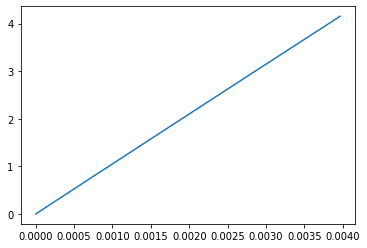

In [20]:
x = np.linspace(0,T,50)
y = [i*compute_neural_network(i,*final_weights) for i in x]
plt.plot(x,y)

### Next, use again the notebook on the Euler method on these parameters, because it doesn't end well with other parameters, overflow of numbers! And Compare!

# Comparison

In [27]:
# Best Weights so far!!

final_weights = [3.0641873497140226,
     4.40067768401828,
     3.874124083551623,
     5.415476025247805,
     5.769875032989906,
     1.6938036716075766,
     -0.6228784667861778,
     -0.38081827622945236,
     -0.8440510989306419,
     0.3233733028296939,
     4.835054189239875,
     0.3202819238913336,
     0.9533768815175125,
     54.19576065247799,
     1.026135336448514]

In [28]:
euler_df = pd.read_csv('results_from_tests/for_test_conformable_nn.csv').set_index('time')
euler_df.head()

,value
time,
0.000000,0.000000
0.000124,0.007018
0.000248,0.010921
0.000372,0.014140
0.000496,0.016982


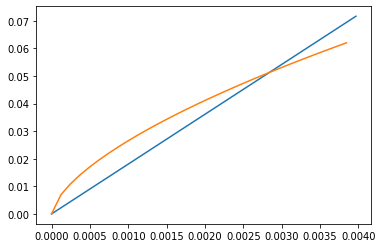

In [29]:
x = euler_df.index
y_neural_net = [i*compute_neural_network(i,*final_weights) for i in x]
plt.plot(x,y_neural_net)

y_euler = euler_df.value
plt.plot(x,y_euler)

#For the Conformable Riccati Equation!!, Know that, in this Euler Scheme, 
#t_k0 was too big. Means that we only used the fractional power series. 
#The Euler scheme, which is applied after the line tk0, is too big

# Some comments for the thesis

1) Basing on the parameters alpha, lambda, mu and nu, the problem in the neural network seems to be really affected
as it seems to be more difficult to do so that the loss function goes to 0.
In one example we almost reached 0, the one above plotted, but is in the other notebook. In other parameters,
trying with various random weights and learning rates, it seems very difficult for the nn to approximate
such functions satisfying to the riccati fractional diff eq (intended with conformable derivative). Maybe we need
more nodes and more hidden layers, but it becomes complicated to code.



